# Model Creation 

# Importing Libraries

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import scienceplots

# Reading FRED Data

In [172]:
lf = pd.read_csv(r'/Users/ryangeorge/GitHub Projects/Unemployment-Prediction-Deep-Learning/Data/CIVPART.csv')

In [173]:
cpi = pd.read_csv(r'/Users/ryangeorge/GitHub Projects/Unemployment-Prediction-Deep-Learning/Data/CPIAUCSL.csv')

In [174]:
ir = pd.read_csv(r'/Users/ryangeorge/GitHub Projects/Unemployment-Prediction-Deep-Learning/Data/FEDFUNDS.csv')

In [175]:
gdp = pd.read_csv(r'/Users/ryangeorge/GitHub Projects/Unemployment-Prediction-Deep-Learning/Data/GDPC1.csv')

In [176]:
ipman = pd.read_csv(r'/Users/ryangeorge/GitHub Projects/Unemployment-Prediction-Deep-Learning/Data/IPMAN.csv')

In [177]:
unr = pd.read_csv(r'/Users/ryangeorge/GitHub Projects/Unemployment-Prediction-Deep-Learning/Data/UNRATE.csv')

In [178]:
velo = pd.read_csv(r'/Users/ryangeorge/GitHub Projects/Unemployment-Prediction-Deep-Learning/Data/M2V.csv')

In [179]:
socsec = pd.read_csv(r'/Users/ryangeorge/GitHub Projects/Unemployment-Prediction-Deep-Learning/Data/SOCSEC.csv')

## Merged Dataset

In [180]:
df = pd.merge(lf, cpi, on='DATE')
df = pd.merge(df, ir, on='DATE')
df = pd.merge(df, gdp, on='DATE')
df = pd.merge(df, ipman, on='DATE')
df = pd.merge(df, unr, on='DATE')
df = pd.merge(df, velo, on='DATE')
df = pd.merge(df, socsec, on='DATE')

In [181]:
df.head()

,DATE,CIVPART,CPIAUCSL,FEDFUNDS,GDPC1,IPMAN,UNRATE,M2V,W823RC1
0,1972-01-01,60.300000,41.333333,3.546667,5632.649,36.211533,5.766667,1.696,38.300000
1,1972-04-01,60.400000,41.600000,4.300000,5760.470,36.959000,5.700000,1.703,38.733333
2,1972-07-01,60.466667,41.933333,4.743333,5814.854,37.466500,5.566667,1.679,39.300000
3,1972-10-01,60.366667,42.366667,5.146667,5912.220,38.890933,5.366667,1.673,47.466667
4,1973-01-01,60.433333,43.033333,6.536667,6058.544,40.181267,4.933333,1.694,49.066667


In [182]:
df['DATE'] = pd.to_datetime(df['DATE'])

# Data Visualization

Text(0.5, 0, 'Date')

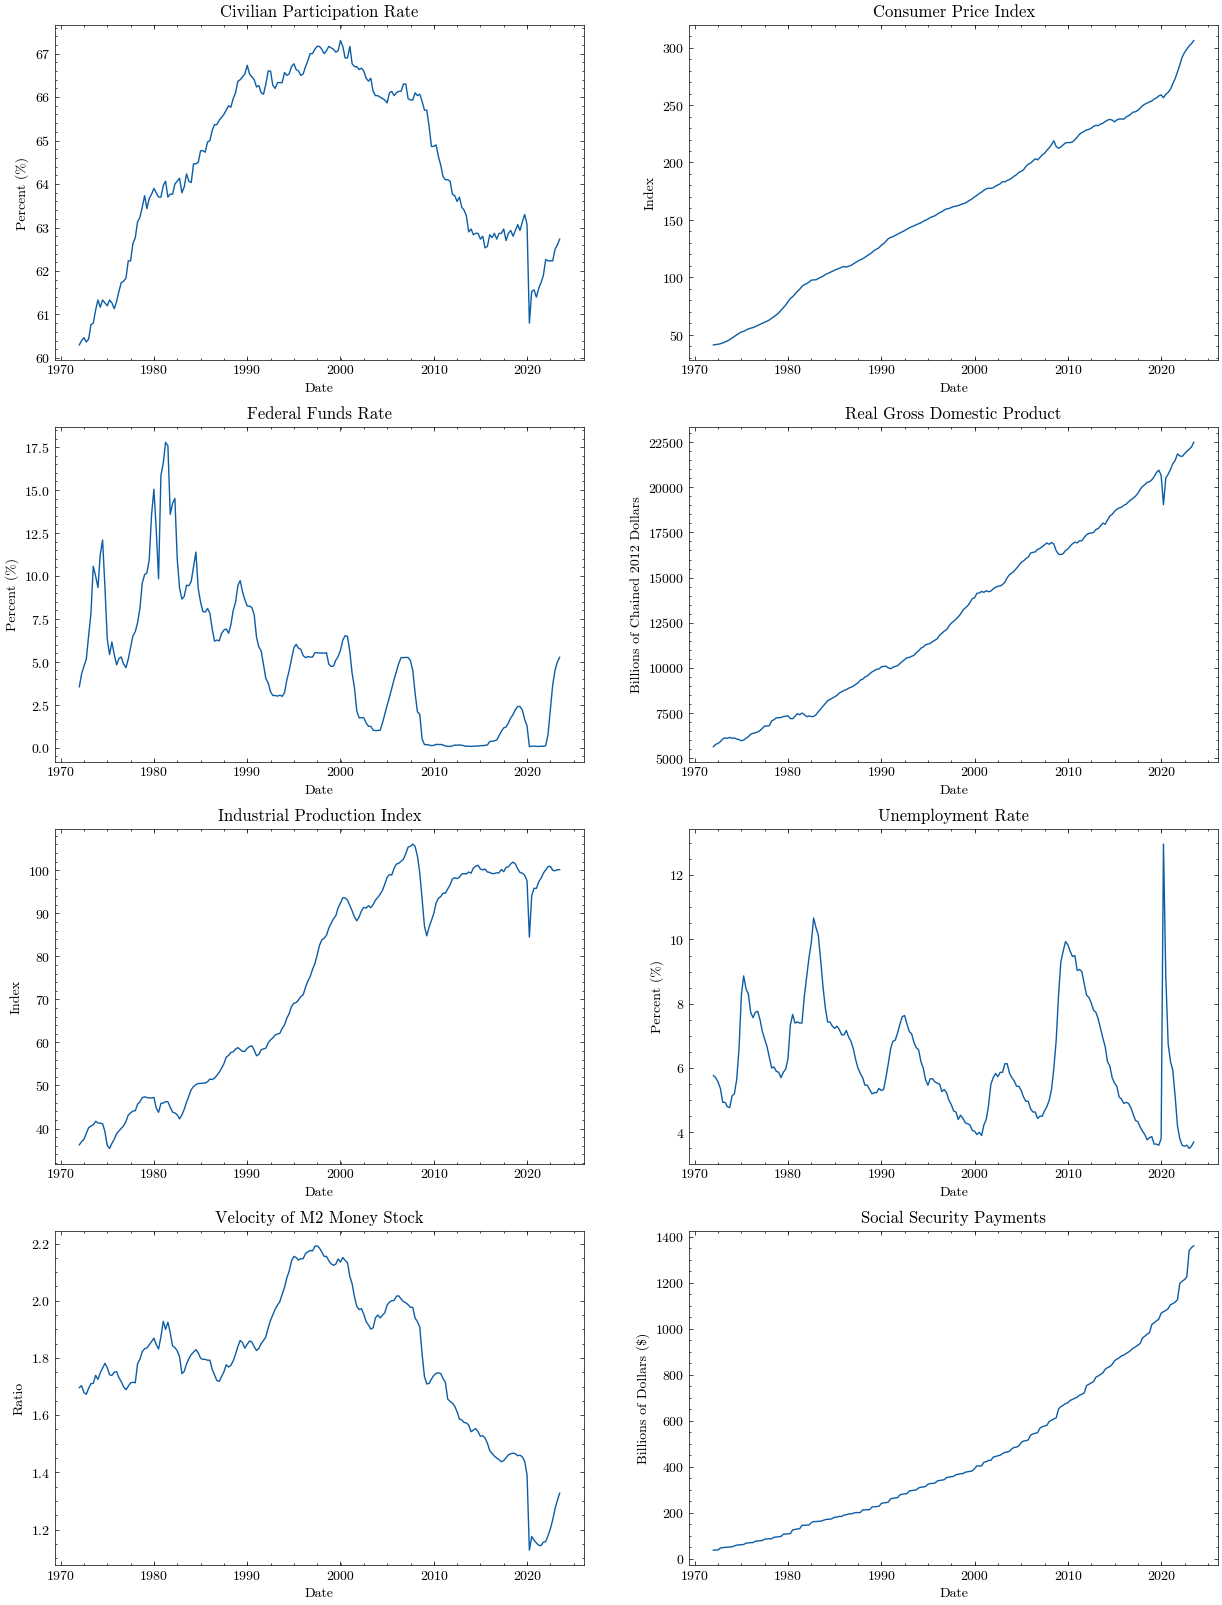

In [183]:
fig, axis = plt.subplots(4, 2, figsize=(15, 20))

axis[0, 0].plot(df['DATE'], df['CIVPART'])
axis[0, 0].set_title('Civilian Participation Rate')
axis[0, 0].set_ylabel('Percent (%)')
axis[0, 0].set_xlabel('Date')

axis[0, 1].plot(df['DATE'], df['CPIAUCSL'])
axis[0, 1].set_title('Consumer Price Index')
axis[0, 1].set_ylabel('Index')
axis[0, 1].set_xlabel('Date')

axis[1, 0].plot(df['DATE'], df['FEDFUNDS'])
axis[1, 0].set_title('Federal Funds Rate')
axis[1, 0].set_ylabel('Percent (%)')
axis[1, 0].set_xlabel('Date')

axis[1, 1].plot(df['DATE'], df['GDPC1'])
axis[1, 1].set_title('Real Gross Domestic Product')
axis[1, 1].set_ylabel('Billions of Chained 2012 Dollars')
axis[1, 1].set_xlabel('Date')

axis[2, 0].plot(df['DATE'], df['IPMAN'])
axis[2, 0].set_title('Industrial Production Index')
axis[2, 0].set_ylabel('Index')
axis[2, 0].set_xlabel('Date')

axis[2, 1].plot(df['DATE'], df['UNRATE'])
axis[2, 1].set_title('Unemployment Rate')
axis[2, 1].set_ylabel('Percent (%)')
axis[2, 1].set_xlabel('Date')

axis[3, 0].plot(df['DATE'], df['M2V'])
axis[3, 0].set_title('Velocity of M2 Money Stock')
axis[3, 0].set_ylabel('Ratio')
axis[3, 0].set_xlabel('Date')

axis[3, 1].plot(df['DATE'], df['W823RC1'])
axis[3, 1].set_title('Social Security Payments')
axis[3, 1].set_ylabel('Billions of Dollars ($)')
axis[3, 1].set_xlabel('Date')

In [226]:
data = df.iloc[:,1:]
corr_data = data.corr()

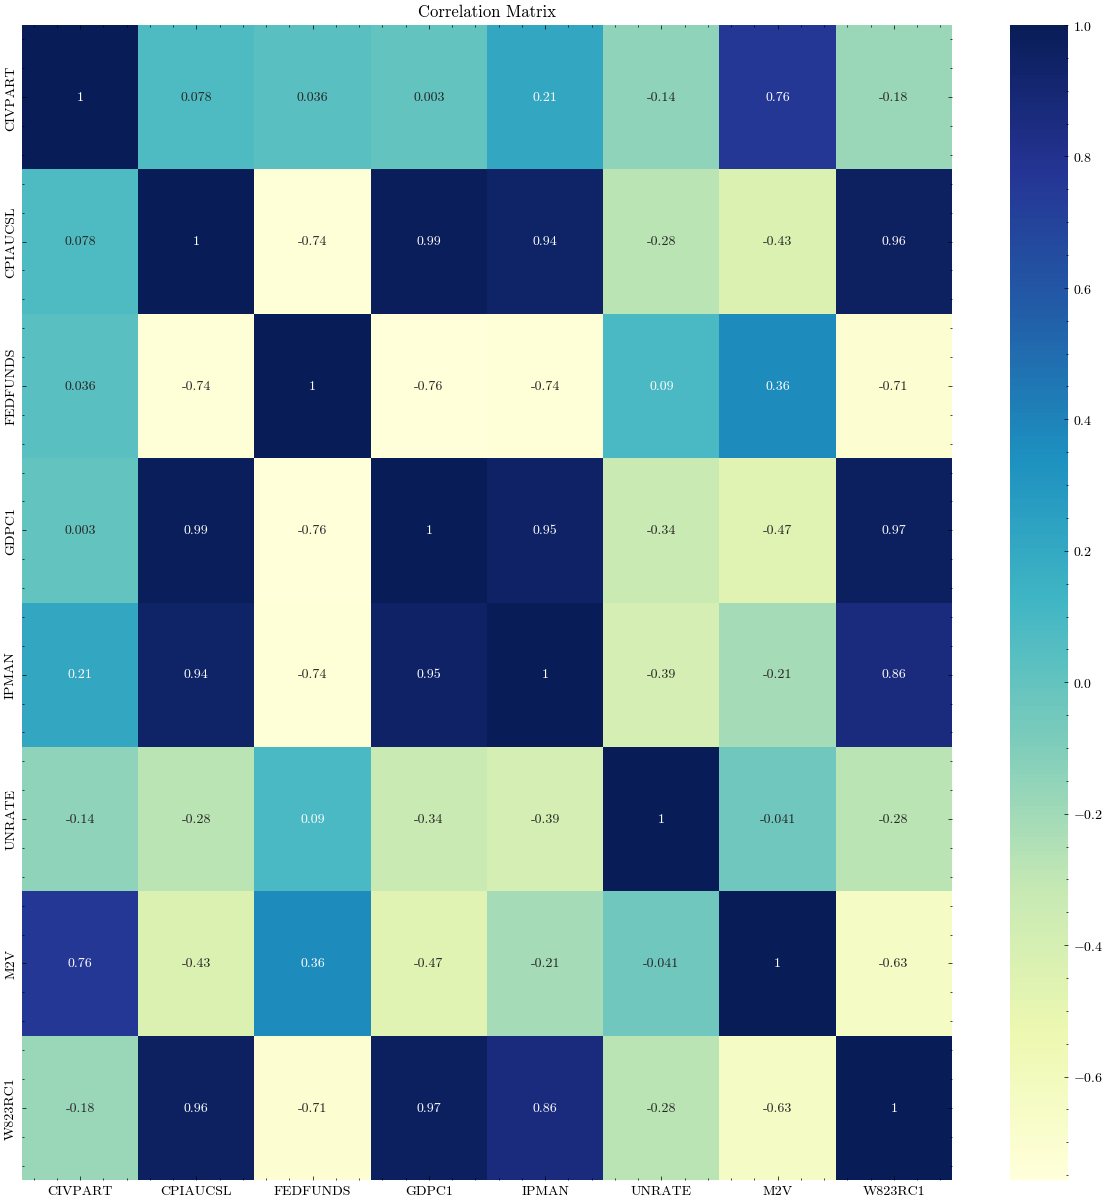

In [229]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr_data, annot=True, cmap='YlGnBu',xticklabels=data.columns, yticklabels=data.columns)
plt.title('Correlation Matrix')
plt.show()